In [61]:
# import numpy, pandas, and math to work with dataframes
import pandas as pd
import math
import numpy as np

# import matplotlib and seaborn for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# imports for machine learning argorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# import gridsearch for hyperparameter tuning
from sklearn.model_selection import GridSearchCV



In [62]:
# read the data into a dataframe
data = pd.read_csv(r'C:\Users\Blake Chobanian\Desktop\coding stuff\housing prices king county\kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


id - Unique ID for each home sold
date - Date of the home sale
price - Price of each home sold
bedrooms - Number of bedrooms
bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
sqft_living - Square footage of the apartments interior living space
sqft_lot - Square footage of the land space
floors - Number of floors
waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
view - An index from 0 to 4 of how good the view of the property was
condition - An index from 1 to 5 on the condition of the apartment,
grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
sqft_above - The square footage of the interior housing space that is above ground level
sqft_basement - The square footage of the interior housing space that is below ground level
yr_built - The year the house was initially built
yr_renovated - The year of the house’s last renovation
zipcode - What zipcode area the house is in
lat - Lattitude
long - Longitude
sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [63]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [65]:
# take an initial look at correlations with price. 
data.corr()['price'].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

no surprise that sq footage has the highest correlation with price. was surprised to see that the size of the lot was not highly correlated and that condition was not well correlated. perhaps there are lots of high value properties in some areas with very small lots. 

no missing or null values

[Text(0.5, 1.0, 'Number of Bedrooms'), Text(0.5, 0, '')]

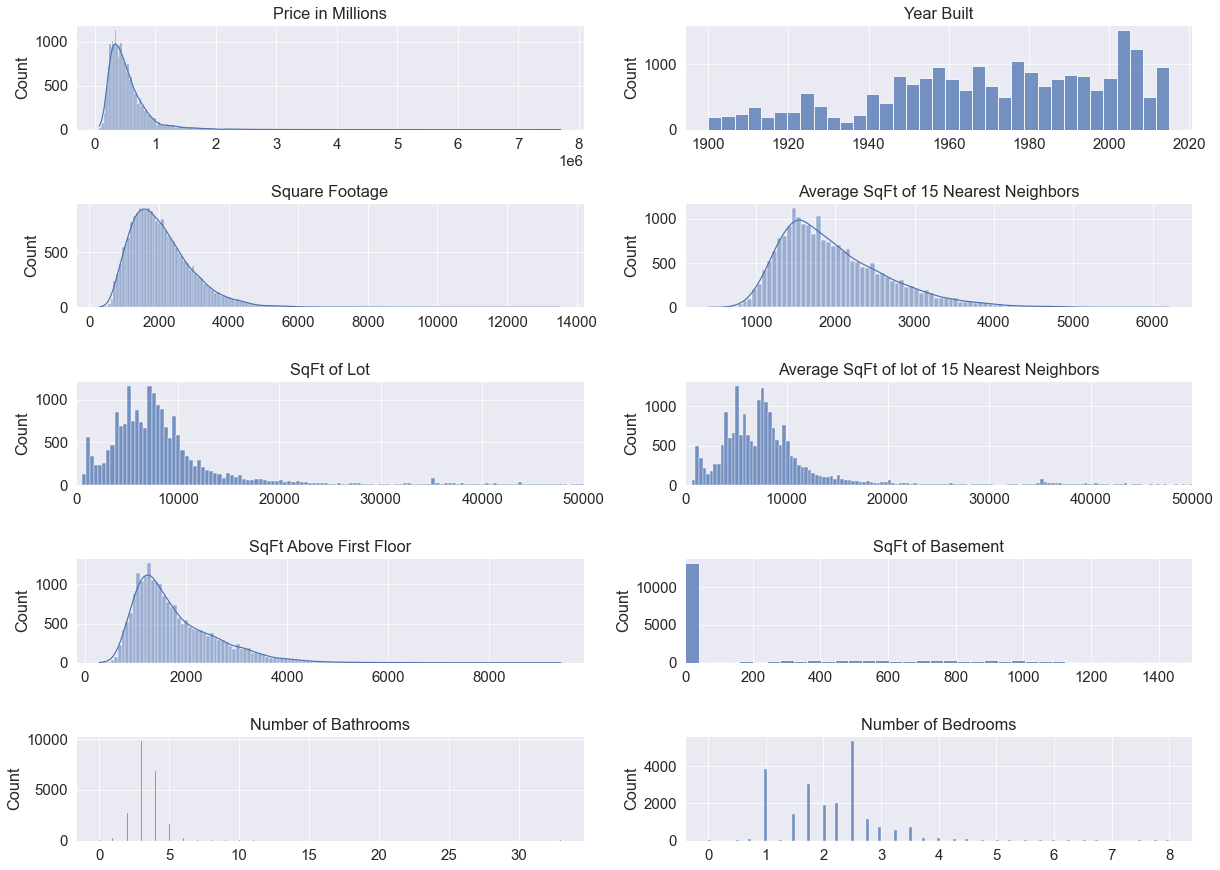

In [66]:
sns.set_style('darkgrid')
sns.set_context('paper', font_scale = 1.7)
fig, ax = plt.subplots(5,2, figsize = (20,15))
plt.subplots_adjust(hspace = 0.7)
sns.histplot( ax = ax[0][0], x = 'price', data = data, kde = True).set(title='Price in Millions', xlabel = None)
sns.histplot( ax = ax[0][1], x = 'yr_built', data = data,).set(title='Year Built', xlabel = None)
sns.histplot( ax = ax[1][0], x = 'sqft_living', data = data, kde = True).set(title='Square Footage', xlabel = None)
sns.histplot( ax = ax[1][1], x = 'sqft_living15', data = data, kde = True).set(title='Average SqFt of 15 Nearest Neighbors', xlabel = None)
ax[2][0].set_xlim([0,50000])
sns.histplot( ax = ax[2][0], x = 'sqft_lot', data = data).set(title='SqFt of Lot', xlabel = None)
ax[2][1].set_xlim([0,50000])
sns.histplot( ax = ax[2][1], x = 'sqft_lot15', data = data).set(title='Average SqFt of lot of 15 Nearest Neighbors', xlabel = None)
sns.histplot( ax = ax[3][0], x = 'sqft_above', data = data, kde = True).set(title='SqFt Above First Floor', xlabel = None)
ax[3][1].set_xlim([0,1500])
sns.histplot( ax = ax[3][1], x = 'sqft_basement', data = data).set(title='SqFt of Basement', xlabel = None)
sns.histplot( ax = ax[4][0], x = 'bedrooms', data = data).set(title='Number of Bathrooms', xlabel = None)
sns.histplot( ax = ax[4][1], x = 'bathrooms', data = data).set(title='Number of Bedrooms', xlabel = None)

-price and square footage are roughly positively skewed bell curves. square footage above the first floor has a very long tail as does the square footage of the nearest 15 neighbors. this may lead to a poor fit when using linear regression.
-most lots were relatively small, but a few lots were orders of magnitude larger. 
- we can see that the overwhelming majority of house prices fall under a million
- most homes do not have a basement
- very few homes have more than 4 bedrooms or more than 4 bathrooms. 

<AxesSubplot:>

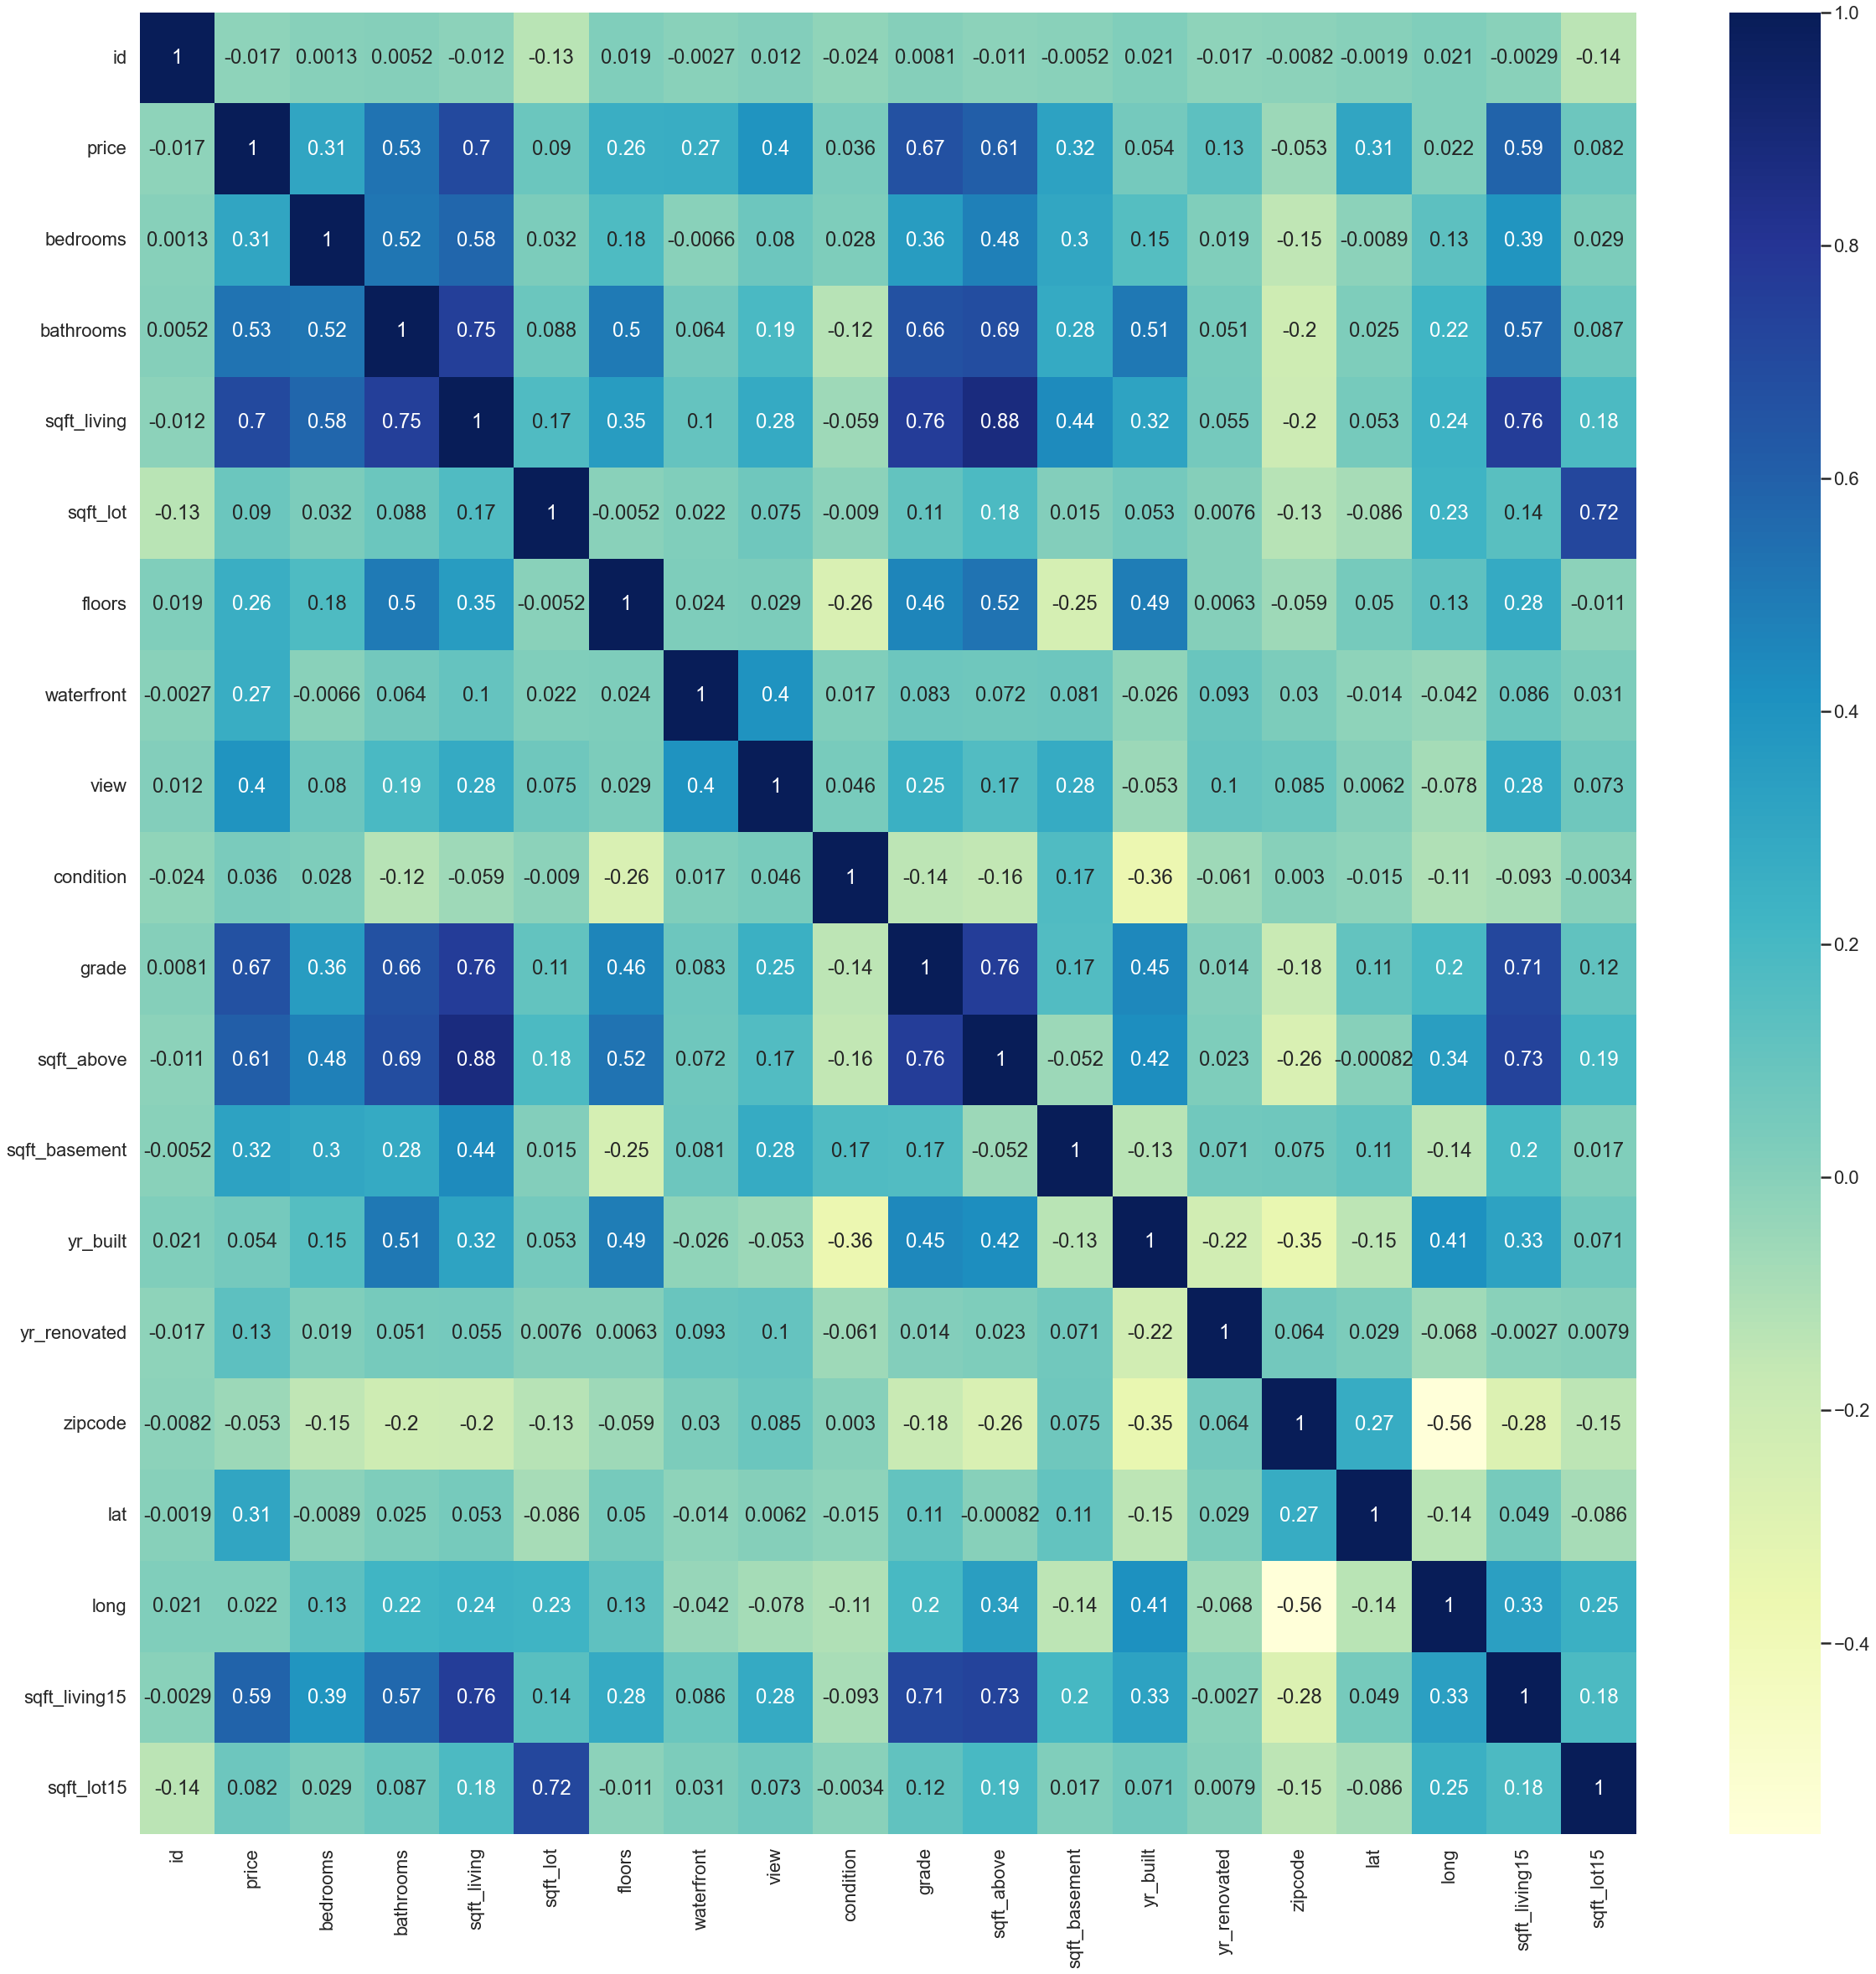

In [67]:
sns.set(rc = {'figure.figsize':(40,40)})
sns.set_context('poster')
sns.heatmap(data.corr(), cmap= 'YlGnBu', annot=True)

- we can see strong correlations between price, size of the living space, and the number of bedrooms and bathrooms. 
- we also see strong correlations between square fotage above the first flood and number of bathrooms, overall square footage, and the grade of the house. 
- as expected be also see strong correlations between square foots of both house and lot to those of the 15 nearest neighbors. 

Zip code and location's impact on price

In [68]:
# can we make a new feature based on zipcode and average house values in those zipcodes
# it may be inappropriate to build a feature based on the entire dataset before reserving a test set
# this may lead to improvements in linear models, but will be far inferior to latitude and longitude in tree based models. 

values = data.groupby('zipcode')['price'].mean().sort_values().to_frame()
#print(values)
counts = data.groupby('zipcode')['id'].count()
#print(counts)
zip_values_popularity = values.merge(counts, left_on = 'zipcode', right_on = 'zipcode')
print(zip_values_popularity)


                price   id
zipcode                   
98002    2.342840e+05  199
98168    2.403284e+05  269
98032    2.512962e+05  125
98001    2.808047e+05  362
98148    2.849086e+05   57
...               ...  ...
98102    9.012583e+05  105
98112    1.095499e+06  269
98040    1.194230e+06  282
98004    1.355927e+06  317
98039    2.160607e+06   50

[70 rows x 2 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]),
 [Text(0, 0, '98001'),
  Text(1, 0, '98002'),
  Text(2, 0, '98003'),
  Text(3, 0, '98004'),
  Text(4, 0, '98005'),
  Text(5, 0, '98006'),
  Text(6, 0, '98007'),
  Text(7, 0, '98008'),
  Text(8, 0, '98010'),
  Text(9, 0, '98011'),
  Text(10, 0, '98014'),
  Text(11, 0, '98019'),
  Text(12, 0, '98022'),
  Text(13, 0, '98023'),
  Text(14, 0, '98024'),
  Text(15, 0, '98027'),
  Text(16, 0, '98028'),
  Text(17, 0, '98029'),
  Text(18, 0, '98030'),
  Text(19, 0, '98031'),
  Text(20, 0, '98032'),
  Text(21, 0, '98033'),
  Text(22, 0, '98034'),
  Text(23, 0, '98038'),
  Text(24, 0, '98039'),
  Text(25, 0, '98040'),
  Text(26, 0, '98042'),
  Text(27, 0, '98045'),
  Text(28, 0, '9

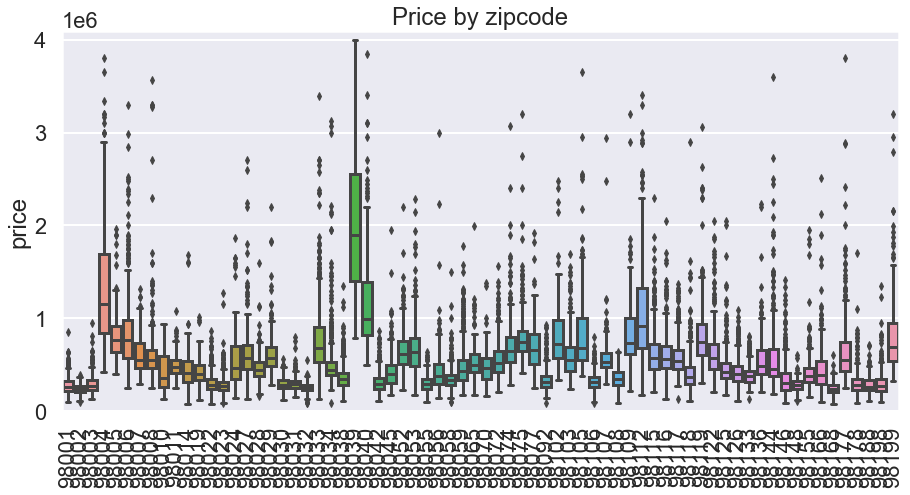

In [69]:
fig, ax = plt.subplots(1,1,figsize = (15,7) )
ax = sns.boxplot( x= 'zipcode',y='price' , data = data).set(title = 'Price by zipcode',xlabel = None)
plt.ylim([0,4100000])
plt.xticks(rotation = 'vertical')


we can see that the average home value varies greatly by zipcode

<AxesSubplot:title={'center':'Price of Houses in millions by location'}, xlabel='long', ylabel='lat'>

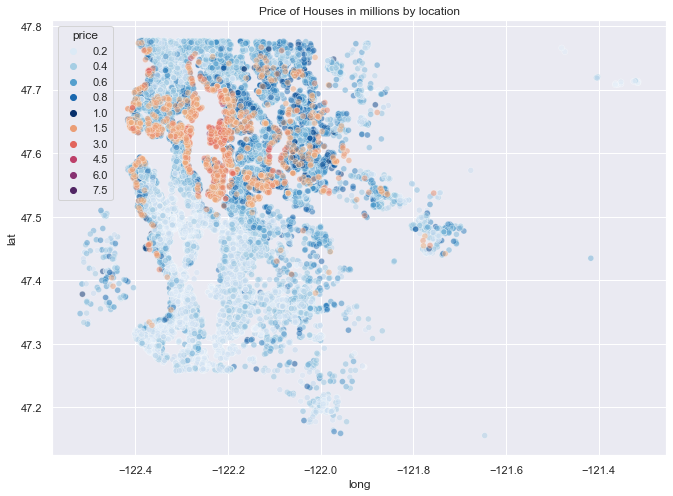

In [70]:
sns.set(rc={'figure.figsize':(11,8)})
high_value = data[data['price']>1000000]
low_value = data[data['price']<= 1000000]
sns.scatterplot(x = 'long', y = 'lat', data = low_value, alpha = 0.5, palette='Blues', hue = 'price').set(title = 'Price of Houses in millions by location')
sns.scatterplot(x = 'long', y = 'lat', data = high_value, alpha = 0.5, palette='flare', hue = 'price')

#position of seattle city center
#plt.scatter(x=-121.986 , y= 47.6675  , color = 'black')

[Text(0.5, 1.0, 'bathrooms'), Text(0.5, 0, '')]

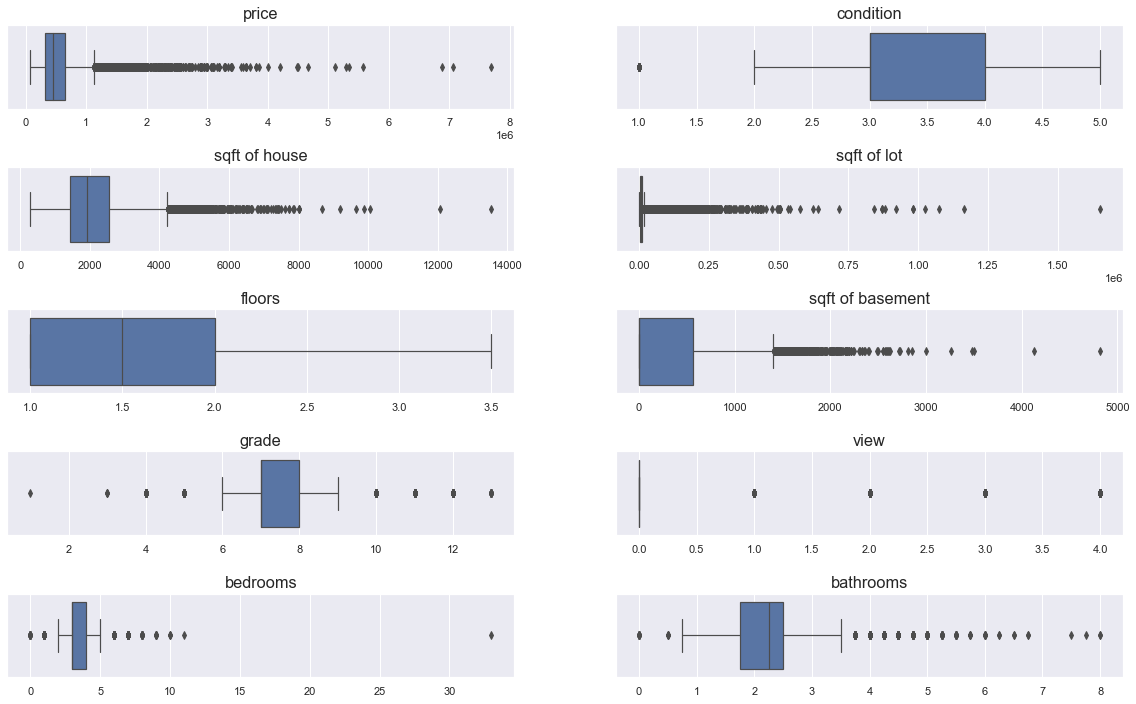

In [71]:
fig, ax = plt.subplots(5,2, figsize = (20,12))
plt.subplots_adjust(hspace = 0.7)
sns.set_context('paper', font_scale = 1.7)
sns.boxplot(ax = ax[0][0], data = data, x = 'price').set(title = 'price',xlabel = None)
sns.boxplot(ax = ax[0][1], data = data, x= 'condition').set(title = 'condition',xlabel = None)
sns.boxplot(ax = ax[1][0], data = data, x= 'sqft_living').set(title = 'sqft of house',xlabel = None)
sns.boxplot(ax = ax[1][1], data = data, x= 'sqft_lot').set(title = 'sqft of lot',xlabel = None)
sns.boxplot(ax = ax[2][0], data = data, x= 'floors').set(title = 'floors',xlabel = None)
sns.boxplot(ax = ax[2][1], data = data, x= 'sqft_basement').set(title = 'sqft of basement',xlabel = None)
sns.boxplot(ax = ax[3][0], data = data, x= 'grade').set(title = 'grade',xlabel = None)
sns.boxplot(ax = ax[3][1], data = data, x= 'view').set(title = 'view',xlabel = None)
sns.boxplot(ax = ax[4][0], data = data, x= 'bedrooms',).set(title = 'bedrooms',xlabel = None)
sns.boxplot(ax = ax[4][1], data = data, x= 'bathrooms').set(title = 'bathrooms',xlabel = None)

we can see that there are alot of outliers on all feature variables
- 3 most expensive homes are not representative of the rest of the dataset
- 1 home has 33 bedrooms and is only ~ 1600 sqft. this must be an error of some kind. we will remove it.
- the house with the largest living space is a significant outlier at only 2.3 million. the lot is huge and nothing else seems to indicate why it went for such a low price. we will remove this property from the set as well.  

In [72]:
pd.set_option('display.max_columns', None)
data[data['price']>4000000].sort_values('price')
#data[data['sqft_living']>8000]
data[data['bedrooms']==33]
#data[data['condition']==1]
#data[data['yr_renovated']!=0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700


In [73]:

data = data[(data['price'] < 6000000)]
data = data[data['bedrooms']< 30]
data = data[data['sqft_living']< 15000]
data.shape


(21609, 21)

we have removed 6 properties from the dataset as the three most expensive are not representative of the properties that we are interested in analizing. based on the mismatches between house size, price, and lot size, I suspect that the other 3 may be data entry errors. 

In [74]:
data.quantile(q=.99, axis = 0)

id               9.558200e+09
price            1.955000e+06
bedrooms         6.000000e+00
bathrooms        4.250000e+00
sqft_living      4.958400e+03
sqft_lot         2.130080e+05
floors           3.000000e+00
waterfront       0.000000e+00
view             4.000000e+00
condition        5.000000e+00
grade            1.100000e+01
sqft_above       4.360000e+03
sqft_basement    1.660000e+03
yr_built         2.014000e+03
yr_renovated     2.008000e+03
zipcode          9.819900e+04
lat              4.777269e+01
long            -1.217830e+02
sqft_living15    4.080000e+03
sqft_lot15       1.576870e+05
Name: 0.99, dtype: float64

[Text(0.5, 1.0, 'year built'), Text(0.5, 0, '')]

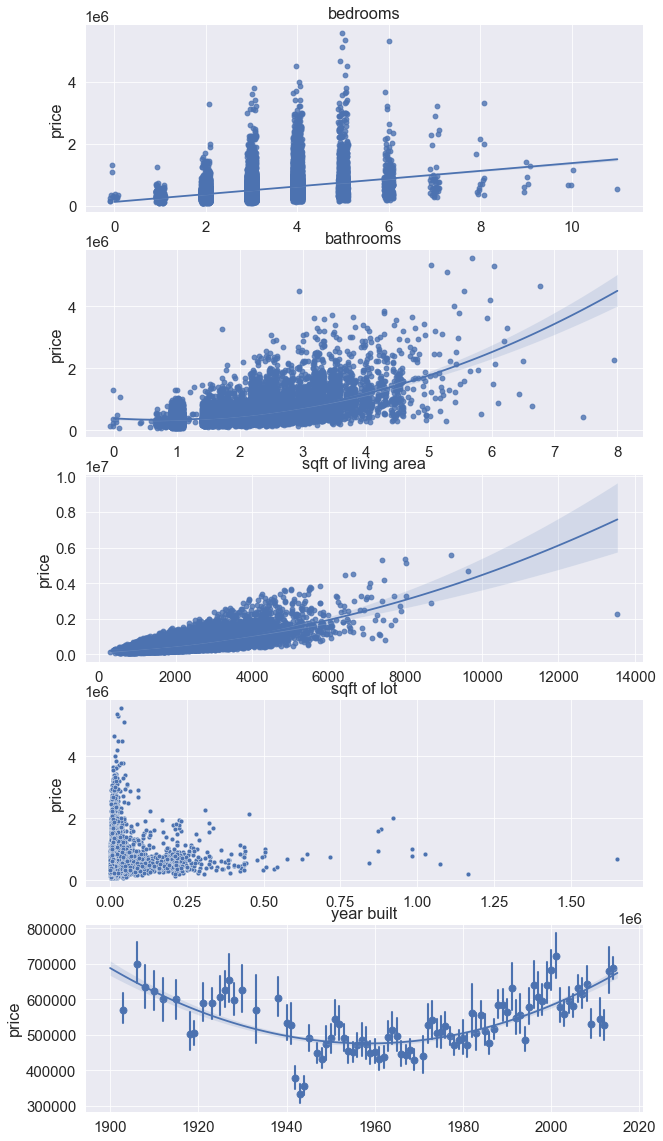

In [75]:
# find price as the function of some important features
fig, ax = plt.subplots(5,1, figsize = (10,20))
sns.regplot(ax = ax[0], data = data, x='bedrooms' , y= 'price', x_jitter = 0.1, order = 1).set(title = 'bedrooms',xlabel = None)
sns.regplot(ax = ax[1], data = data, x='bathrooms' , y= 'price', x_jitter = 0.1, order = 2).set(title = 'bathrooms',xlabel = None)
sns.regplot(ax = ax[2], data = data, x='sqft_living' , y= 'price', order = 2).set(title = 'sqft of living area',xlabel = None)
sns.scatterplot(ax = ax[3], data = data, x='sqft_lot' , y= 'price').set(title = 'sqft of lot',xlabel = None)
sns.regplot(ax = ax[4], data = data, x='yr_built' , y= 'price', x_bins = 120, order = 2).set(title = 'year built',xlabel = None)

we can see that the correlation between price ans sqft_lot is not highly correlated due to the high number of high value properties near downtown that are on very small lots. 

In [76]:
data['bedrooms'].value_counts().sort_index()

0       13
1      199
2     2760
3     9824
4     6882
5     1600
6      270
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

In [77]:
data['bathrooms'].value_counts().sort_index()

0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3047
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50      99
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
8.00       1
Name: bathrooms, dtype: int64

In [78]:
data['floors'].value_counts().sort_index()

1.0    10679
1.5     1910
2.0     8239
2.5      160
3.0      613
3.5        8
Name: floors, dtype: int64

In [79]:
data['view'].value_counts().sort_index()

0    19488
1      332
2      962
3      509
4      318
Name: view, dtype: int64

In [80]:
data['condition'].value_counts().sort_index()

1       30
2      172
3    14029
4     5678
5     1700
Name: condition, dtype: int64

In [81]:
data['grade'].value_counts().sort_index()

1        1
3        3
4       29
5      242
6     2038
7     8980
8     6068
9     2615
10    1134
11     398
12      90
13      11
Name: grade, dtype: int64

In [82]:
data['waterfront'].value_counts()

0    21447
1      162
Name: waterfront, dtype: int64

[Text(0.5, 1.0, 'Year the House was Built'), Text(0.5, 0, '')]

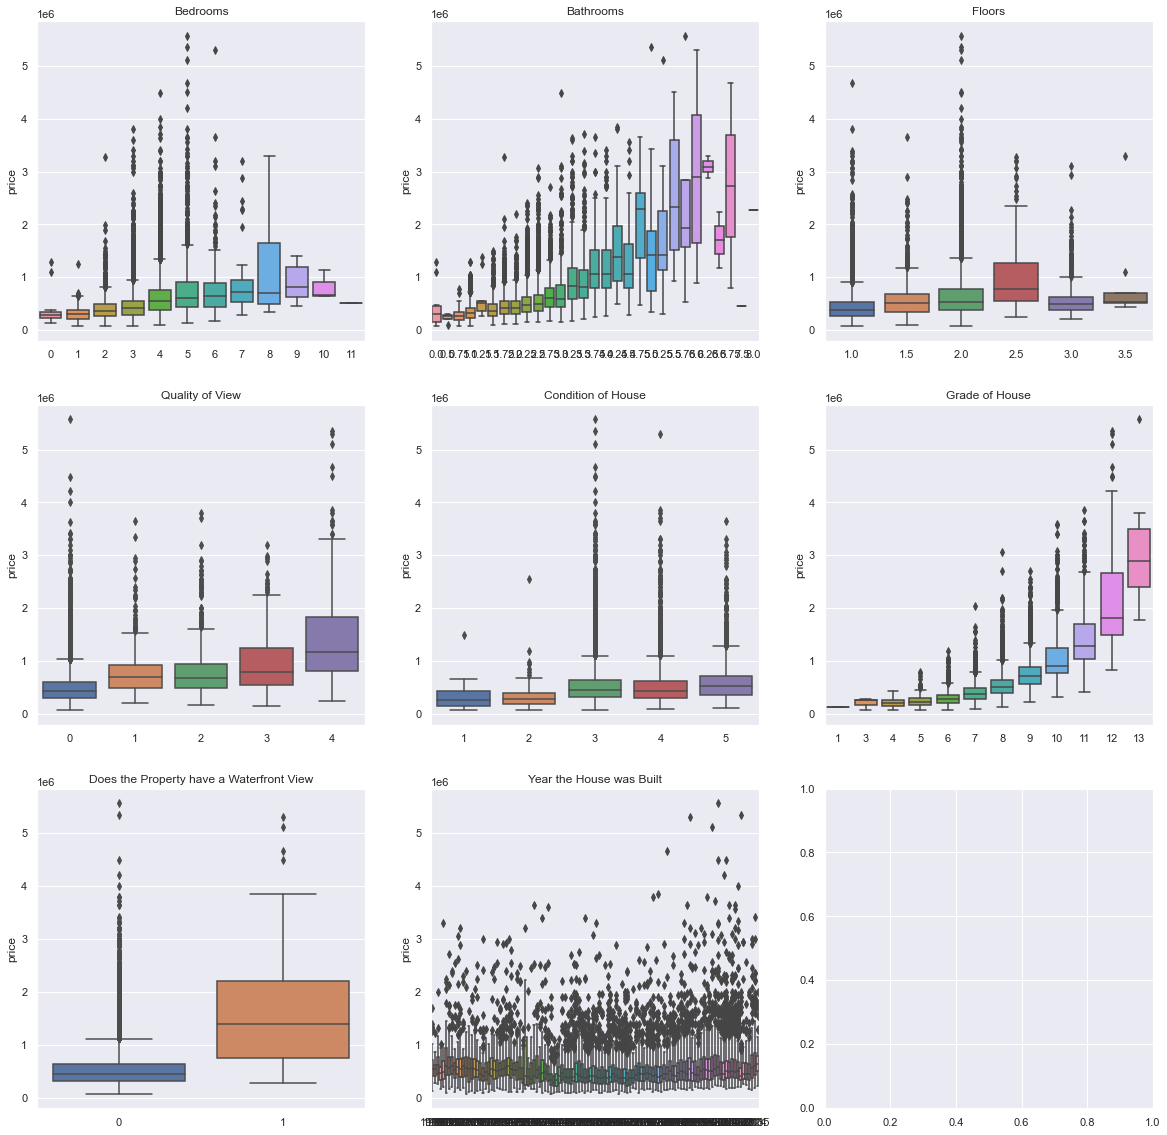

In [83]:
# find distribution of price along some important features
sns.set(rc={'figure.figsize':(20,20)})
fig , ax = plt.subplots(3,3)
sns.boxplot(ax = ax[0][0], x= 'bedrooms', y= 'price', data = data).set(title = 'Bedrooms',xlabel = None)
sns.boxplot(ax = ax[0][1], x= 'bathrooms', y= 'price', data = data).set(title = 'Bathrooms',xlabel = None)
sns.boxplot(ax = ax[0][2], x= 'floors', y= 'price', data = data).set(title = 'Floors',xlabel = None)
sns.boxplot(ax = ax[1][0], x= 'view', y= 'price', data = data).set(title = 'Quality of View',xlabel = None)
sns.boxplot(ax = ax[1][1], x= 'condition', y= 'price', data = data).set(title = 'Condition of House',xlabel = None)
sns.boxplot(ax = ax[1][2], x= 'grade', y= 'price', data = data).set(title = 'Grade of House',xlabel = None)
sns.boxplot(ax = ax[2][0], x= 'waterfront', y= 'price', data = data).set(title = 'Does the Property have a Waterfront View',xlabel = None)
sns.boxplot(ax = ax[2][1], x= 'yr_built', y= 'price', data = data).set(title = 'Year the House was Built',xlabel = None)

we can see what look like linear relationships between price and bedrooms and view
the relationship weith grade and bathrooms looks exponential. 
the relationship between condition and price seems to be binary? houses with a condition of at least 3 seem to have the same average value and those below 3 seem to be of roughly the same value

In [84]:
# how does condtion effect value?
print(data.groupby('condition')['price'].mean())
data.groupby('condition')['price'].std()
# I think that this feature could be remapped to have 3 values 1,2 --> 1: 3,4--> 2: 5 --> 3

condition
1    334431.666667
2    327287.145349
3    541095.657852
4    519936.071680
5    612401.864706
Name: price, dtype: float64


condition
1    271172.804837
2    245418.413220
3    356289.602898
4    345654.514854
5    411092.305057
Name: price, dtype: float64

In [85]:
# remap condition so that 1,2 -> 1, 3,4 -> 2, and 5-> 3 
data['condition_tri'] =((data['condition']+1)/2).apply(np.floor)
data['condition_tri'].value_counts()
# this feature turned out to not make a significant difference to the models

2.0    19707
3.0     1700
1.0      202
Name: condition_tri, dtype: int64

Train test split

In [86]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'condition_tri'],
      dtype='object')

In [87]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade',\
    'sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15','yr_renovated','zipcode']
target = ['price']
X_train, X_test, y_train, y_test = train_test_split(data[features],data[target], test_size = 0.3, random_state = 42)

In [88]:
# remove properties with features 4 standard deviations from the mean from the training set
train = X_train.join(y_train)
train.head()
before = len(train)
train = train[(train['price'] <= 3476302)]
train = train[train['bedrooms']<= 8]
train = train[train['sqft_living']<= 7290]
train = train[train['bathrooms']<= 5.5]
train = train[train['sqft_lot']<= 498577]
train = train[train['grade']<= 12]
train = train[train['sqft_above']<= 6114]
train = train[train['sqft_basement']<= 2372]
after = len(train)
print('We have removed', before - after, 'rows from the training set')
print('This represents ', (before - after)*100/before, '% of the training set')

X_train = train[features]
y_train = train[target]
print(X_train.shape, y_train.shape)



We have removed 59 rows from the training set
This represents  0.3900568557450747 % of the training set
(15067, 18) (15067, 1)


Linear Regression

In [89]:
linreg = LinearRegression(normalize = True)
linreg.fit(X_train,y_train)
lin_pred = linreg.predict(X_test)
linreg_score = metrics.r2_score(lin_pred,y_test)
print('R^2 of linear model: {}'.format(linreg_score))
print('Mean Absolute Error of linear model: ', metrics.mean_absolute_error(lin_pred,y_test))
print('Root Mean Squared Error: ', metrics.mean_squared_error(lin_pred,y_test, squared = False))
coefficients_linreg = pd.DataFrame(X_test.columns, linreg.coef_.reshape(18,))
print(coefficients_linreg)

R^2 of linear model: 0.48644718042804014
Mean Absolute Error of linear model:  124106.2662177916
Root Mean Squared Error:  208611.1726897659
                            0
-30839.667291        bedrooms
 41218.058369       bathrooms
 74.337103        sqft_living
 0.204512            sqft_lot
 15929.421161          floors
 471725.786091     waterfront
 54195.470080            view
 25797.446305       condition
 96171.089406           grade
 72.464023         sqft_above
 56.013643      sqft_basement
-2541.715576         yr_built
 601350.825460            lat
-181619.447133           long
 34.320098      sqft_living15
-0.433801          sqft_lot15
 16.196980       yr_renovated
-553.051513           zipcode


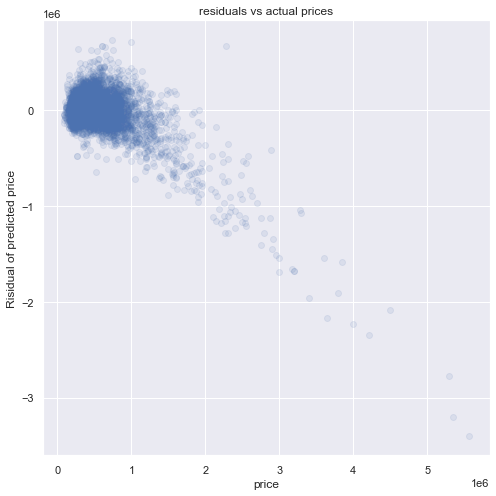

In [90]:
# visualizing predicted value vs actual value of our linear model
plt.figure(figsize = (8,8))
plt.scatter(y_test,lin_pred-y_test, alpha = .1)
plt.xlabel('price')
plt.ylabel('Risidual of predicted price')
plt.title('residuals vs actual prices')
plt.show()

Random Forest

In [91]:
forest = RandomForestClassifier()
forest.fit(X_train,np.ravel(y_train))
forest_pred = forest.predict(X_test)

In [92]:
forest_score =metrics.r2_score(forest_pred,y_test)
print('R^2 of Random Forest Model: {}'.format(forest_score))
print('Mean Absolute Error of Random Forest Model: ', metrics.mean_absolute_error(forest_pred,y_test))
print('Root Mean Squared Error: ', metrics.mean_squared_error(forest_pred,y_test, squared = False))

R^2 of Random Forest Model: 0.6909547425463162
Mean Absolute Error of Random Forest Model:  97304.9304334413
Root Mean Squared Error:  189272.59960848957


In [93]:
# search for best params

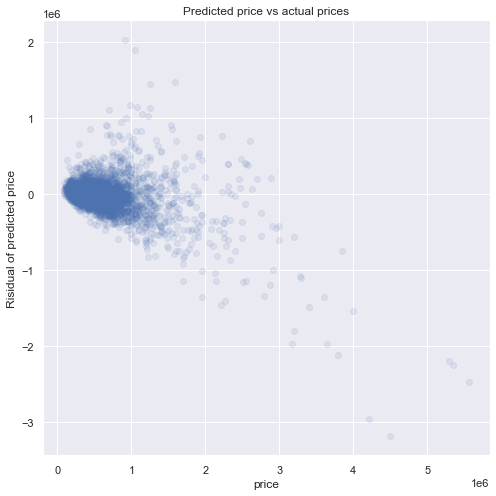

In [94]:
# visualizing predicted value vs actual value for the random forest model
plt.figure(figsize = (8,8))
risiduals_forest = pd.DataFrame(forest_pred)-np.array(y_test)
plt.scatter(y_test,risiduals_forest, alpha=.1)
plt.xlabel('price')
plt.ylabel('Risidual of predicted price')
plt.title('Predicted price vs actual prices')
plt.show()

XGBoost

In [95]:
data_dmatrix = xgb.DMatrix(data=data[features],label=data[target])
xg = xgb.XGBRegressor(objective = 'reg:squarederror', colsample_bytree = 0.6, learning_rate = 0.08, max_depth = 7, alpha = 5, n_estimators= 1000, min_child_weight = 20)
xg.fit(X_train, y_train)
xg_preds = xg.predict(X_test)
xg_score = metrics.r2_score(xg_preds, y_test)
print('R^2 of XGBoost model: {}'.format(xg_score))
print('Mean Absolute Error of XGBoost Model: ', metrics.mean_absolute_error(xg_preds,y_test))
print('Root Mean Squared Error: ', metrics.mean_squared_error(xg_preds,y_test, squared = False))

R^2 of XGBoost model: 0.8584976347918266
Mean Absolute Error of XGBoost Model:  66329.77685388709
Root Mean Squared Error:  125535.33154171814


In [96]:
# # hyperperameter tuning
# parameters = {'n_estimators': [200], 
#               'learning_rate': [.075,.08,.085],
#               'max_depth': [7],
#               'colsample_bytree': [.5,.6,.7],
#               'alpha': [1,2,3],
#               'min_child_weight': [16,20,24]}
# xg_gscv = GridSearchCV(estimator = xg, param_grid = parameters, cv = 3, n_jobs = -1).fit(X_train, y_train)
# print("Best score: %0.3f" % xg_gscv.best_score_)
# print("Best parameters set:", xg_gscv.best_params_)

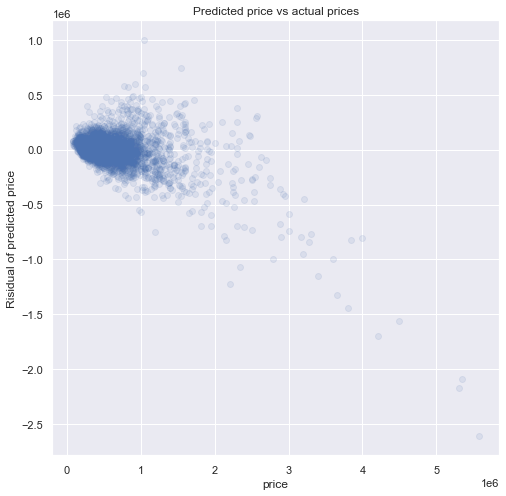

In [97]:
# visualizing predicted value vs actual value for the xgboost model
plt.figure(figsize = (8,8))
risiduals_xg = pd.DataFrame(xg_preds)-np.array(y_test)
plt.scatter(y_test,risiduals_xg, alpha = .1)
plt.xlabel('price')
plt.ylabel('Risidual of predicted price')
plt.title('Predicted price vs actual prices')
plt.show()

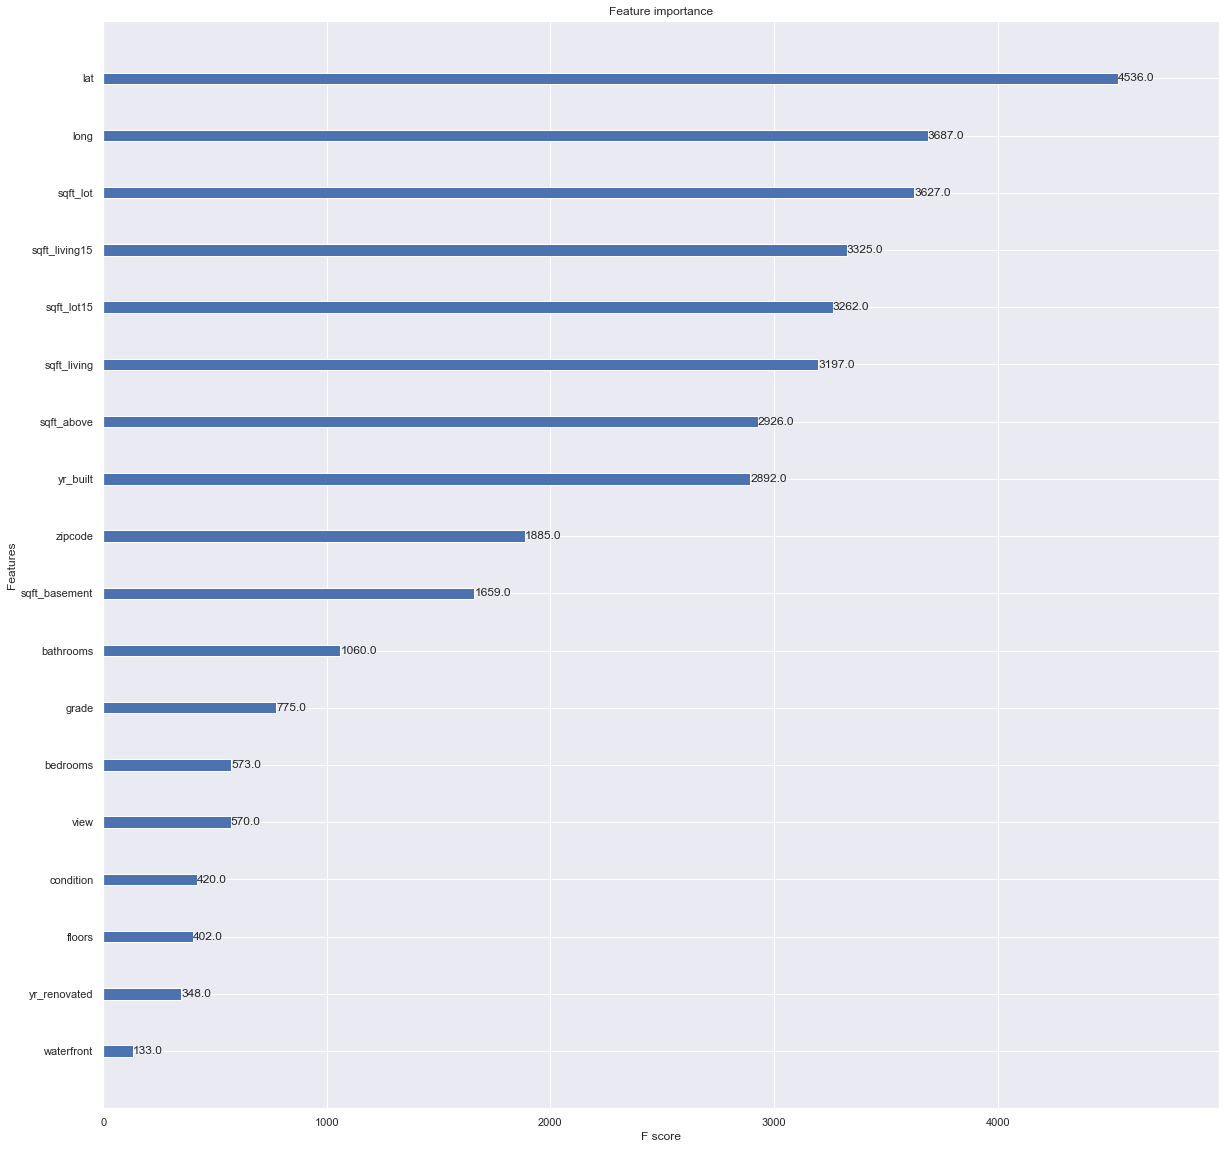

In [98]:
xgb.plot_importance(xg)
plt.rcParams["figure.figsize"] = (3,3)
plt.show()

-Unsurprisingly we find that location (lat and long) had the greatest impact on property values. As they say... location, location, location
-also unsurprisingly, the other largest impactors were size of house, size of lot, house size and lot size of neighbors, how much of living space is above the ground
-features with the lowest importance were waterfront (which may not have been a very accurately attributed label), number of floors, condition, bedrooms, and view.
-I think its interesting to note that the number of bedrooms was about twice as important as number of bedrooms.
-the bigest surprise was that year built was a very important feature even though the trend does not look continuous, there is a clear upward trend from about 1942-2001 

How accurate was our model for homes under a million dollars? 

In [110]:
 # join y_test and xg_predictions together in 1 dataframe
 xg_preds_df = pd.DataFrame(xg_preds)
 print(y_test.info, xg_preds_df)
 score_df = xg_preds_df.join(y_test.reset_index(drop = True))
 score_df

<bound method DataFrame.info of            price
4983    450000.0
10257   313950.0
4045    704300.0
21271   320000.0
10497   410000.0
...          ...
20406   359950.0
11759   206000.0
85      940000.0
7710   1000000.0
167     807100.0

[6483 rows x 1 columns]>                  0
0     5.050479e+05
1     3.928526e+05
2     5.645099e+05
3     3.069230e+05
4     4.529244e+05
...            ...
6478  3.790242e+05
6479  2.172369e+05
6480  1.007625e+06
6481  1.306976e+06
6482  7.159895e+05

[6483 rows x 1 columns]


,0,price
0,5.050479e+05,450000.0
1,3.928526e+05,313950.0
2,5.645099e+05,704300.0
3,3.069230e+05,320000.0
4,4.529244e+05,410000.0
...,...,...
6478,3.790242e+05,359950.0
6479,2.172369e+05,206000.0
6480,1.007625e+06,940000.0
6481,1.306976e+06,1000000.0


In [113]:
# drop rows with for homes over a million dollars and split into 2 dataframes again for testing
score_df = score_df.rename(columns={0: 'actual price', 'price': 'xg_prediction'})
score_df = score_df[score_df['actual price']< 1000000]
score_df
xg_preds_mil = score_df['xg_prediction']
y_test_mil = score_df['actual price']

In [114]:
# evaluate model for homes under a million
xg_score_mil = metrics.r2_score(xg_preds_mil, y_test_mil)
print('R^2 of XGBoost model for homes under a million: {}'.format(xg_score_mil))
print('Mean Absolute Error of XGBoost Model for homes under a million: ', metrics.mean_absolute_error(xg_preds_mil,y_test_mil))

R^2 of XGBoost model for homes under a million: 0.8545742700862398
Mean Absolute Error of XGBoost Model for homes under a million:  51783.95431453623


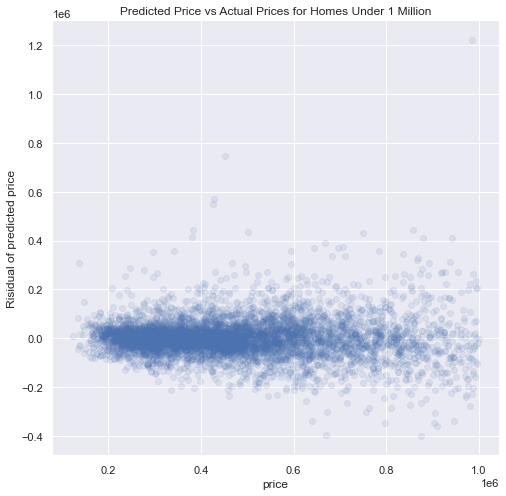

In [122]:
# visualizing predicted value vs actual value for the xgboost model
plt.figure(figsize = (8,8))
risiduals_xg_mil = (xg_preds_mil)-(y_test_mil)
plt.scatter(y_test_mil,risiduals_xg_mil, alpha = .1)
plt.xlabel('price')
plt.ylabel('Risidual of predicted price')
plt.title('Predicted Price vs Actual Prices for Homes Under 1 Million')
plt.show()